In [27]:
import pandas as pd

# Load the dataset
file_path = 'housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
# Check for missing data in the dataset
missing_data = data.isnull().sum()

# Display columns with missing data
print(missing_data[missing_data > 0])

total_bedrooms    207
dtype: int64


In [29]:
# Remove rows with missing data before encoding
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [30]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'ocean_proximity' column
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['ocean_proximity']]).toarray()
encoded_feature_names = encoder.get_feature_names_out(['ocean_proximity'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)

# Combine the encoded columns with the original dataset
data = pd.concat([data.drop('ocean_proximity', axis=1), encoded_df], axis=1)

# Display the preprocessed data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [31]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Validation Metrics:
Mean Absolute Error (MAE): 31720.791162221678
Mean Squared Error (MSE): 2376056231.2846966
Root Mean Squared Error (RMSE): 48744.80722379253
R-squared (R²): 0.8262504702161796


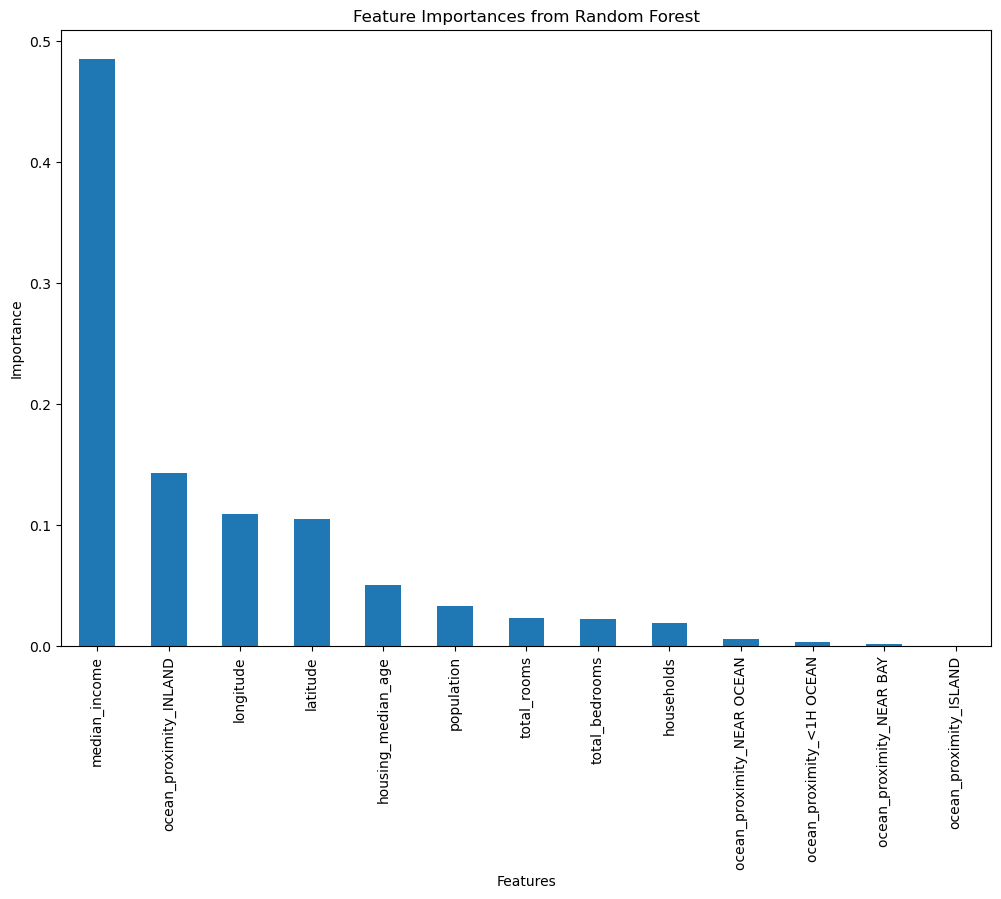

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define features and target variable
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a basic Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate validation metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# Display validation metrics
print("\nValidation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

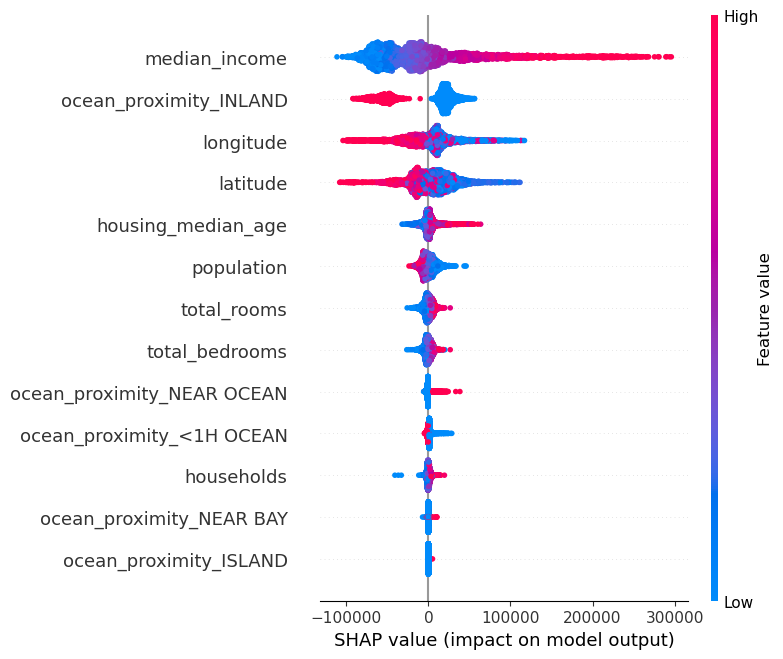

In [34]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)

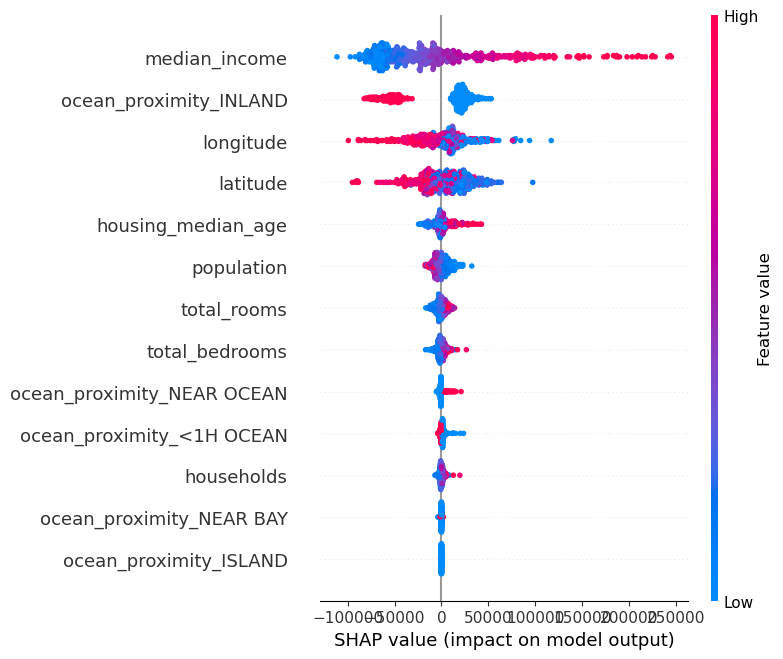

In [36]:
# Take a random sample of the test data (e.g., 500 instances)
X_sample = X_test.sample(500, random_state=42)
shap_values = explainer.shap_values(X_sample)

# Visualize SHAP summary plot for the sample
shap.summary_plot(shap_values, X_sample)

In [37]:
import dice_ml
from dice_ml import Dice

# Initialize DiCE for a regression model
data_dice = dice_ml.Data(
    dataframe=data, 
    continuous_features=['longitude', 'latitude', 'housing_median_age', 
                         'total_rooms', 'total_bedrooms', 'population', 
                         'households', 'median_income'], 
    outcome_name='median_house_value'
)
model_dice = dice_ml.Model(model=model, backend="sklearn", model_type='regressor')

# Create a DiCE explainer
dice_explainer = Dice(data_dice, model_dice)

# Generate counterfactuals for a test instance
query_instance = X_test.iloc[[0]]  # Use the first instance from X_test
dice_exp = dice_explainer.generate_counterfactuals(query_instance, total_CFs=3, desired_range=[200000, 300000])

# Display counterfactuals
dice_exp.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

Query instance (original outcome : 212173.0)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-117.239998,32.790001,20.0,961.0,278.0,525.0,254.0,3.1838,0.0,0.0,0.0,0.0,1.0,212173.0



Diverse Counterfactual set (new outcome: [200000, 300000])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-117.24,32.79,20.0,961.0,669.7,525.0,254.0,3.1838,0.0,0.0,0.0,0.0,1.0,243436.062500
1,-117.24,34.81,20.0,961.0,278.0,525.0,1488.4,3.1838,0.0,0.0,0.0,0.0,1.0,215762.015625
2,-117.24,40.20,20.0,961.0,278.0,525.0,254.0,3.1838,0.0,0.0,0.0,0.0,1.0,205793.015625


In [40]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['House Value'], mode='regression')

# Explain a single prediction
exp = explainer.explain_instance(X_test.iloc[0].values, model.predict, num_features=5)

# Show the explanation
exp.show_in_notebook()

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
